In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data


In [0]:
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

#Train parameters
num_steps = 100000
batch_size = 128
learning_rate = 0.0002

#Network parameters
image_dim = 784
gen_hidden_dim = 256
disc_hidden_dim = 256
noise_dim = 100

In [0]:
#A custom initialization
def glorot_init(shape):
  return tf.random_normal(shape=shape, stddev=1. / tf.sqrt(shape[0] / 2.))

#Store layers weight and bias
weights = {
    'gen_hidden1': tf.Variable(glorot_init([noise_dim, gen_hidden_dim])),
    'gen_out': tf.Variable(glorot_init([gen_hidden_dim, image_dim])),
    'disc_hidden1': tf.Variable(glorot_init([image_dim, disc_hidden_dim])),
    'disc_out': tf.Variable(glorot_init([disc_hidden_dim, 1])),
}

biases = {
    'gen_hidden1': tf.Variable(tf.zeros([gen_hidden_dim])),
    'gen_out': tf.Variable(tf.zeros([image_dim])),
    'disc_hidden1': tf.Variable(tf.zeros([disc_hidden_dim])),
    'disc_out': tf.Variable(tf.zeros([1])),
}


In [0]:
#Generator
def generator(x):
  hidden_layer = tf.add(tf.matmul(x, weights['gen_hidden1']), biases['gen_hidden1'])
  hidden_layer = tf.nn.relu(hidden_layer)
  out_layer = tf.add(tf.matmul(hidden_layer, weights['gen_out']), biases['gen_out'])
  out_layer = tf.nn.relu(out_layer)

  return out_layer

#Discriminator
def discriminator(x):
  hidden_layer = tf.matmul(x, weights['disc_hidden1'])
  hidden_layer = tf.add(hidden_layer, biases['disc_hidden1'])
  hidden_layer = tf.nn.relu(hidden_layer)
  out_layer = tf.add(tf.matmul(hidden_layer, weights['disc_out']), biases['disc_out'])
  out_layer = tf.nn.sigmoid(out_layer)

  return out_layer


In [0]:
#Build the network model
gen_input = tf.placeholder(tf.float32, shape=[None, noise_dim], name='input_noise')
disc_input = tf.placeholder(tf.float32, shape=[None, image_dim], name='disc_input')

#Build the generator network
gen_sample = generator(gen_input)

#Build 2 discriminator networks
disc_real = discriminator(disc_input)
disc_fake = discriminator(gen_sample)

#Build loss
gen_loss = -tf.reduce_mean(tf.log(disc_fake))
disc_loss = -tf.reduce_mean(tf.log(disc_real) + tf.log(1. - disc_fake))

#Build optimizers
optimizer_gen = tf.train.AdamOptimizer(learning_rate=learning_rate)
optimizer_disc = tf.train.AdamOptimizer(learning_rate=learning_rate)

In [0]:
#Training varibvles for each optimizer
#By defult in Tensorflow, all variables are updated by each optimizer,
#so we need to precise for each one of them the specific varibales to update.
#Geneartor Network Variables
gen_vars = [weights['gen_hidden1'], weights['gen_out'],
       biases['gen_hidden1'], biases['gen_out']]

#Discriminator net variables
disc_vars = [weights['disc_hidden1'], weights['disc_out'],
       biases['disc_hidden1'], biases['gen_out']]
#create training operations
train_gen = optimizer_gen.minimize(gen_loss, var_list=gen_vars)
train_disc = optimizer_disc.minimize(disc_loss, var_list=disc_vars)

#Initialize the variables
init = tf.global_variables_initializer()


Step 1: Generator Loss: 0.457806, Discriminator Loss: 1.618839
Step 1000: Generator Loss: 3.135450, Discriminator Loss: 0.203312
Step 2000: Generator Loss: 1.543825, Discriminator Loss: 0.350670
Step 3000: Generator Loss: 2.498414, Discriminator Loss: 0.388193
Step 4000: Generator Loss: 2.104555, Discriminator Loss: 0.397274
Step 5000: Generator Loss: 2.139219, Discriminator Loss: 0.418258
Step 6000: Generator Loss: 2.081851, Discriminator Loss: 0.467518
Step 7000: Generator Loss: 1.988706, Discriminator Loss: 0.556450
Step 8000: Generator Loss: 2.085646, Discriminator Loss: 0.406664
Step 9000: Generator Loss: 2.013673, Discriminator Loss: 0.461516
Step 10000: Generator Loss: 1.941771, Discriminator Loss: 0.522558
Step 11000: Generator Loss: 1.973153, Discriminator Loss: 0.622609
Step 12000: Generator Loss: 1.987755, Discriminator Loss: 0.603890
Step 13000: Generator Loss: 2.153899, Discriminator Loss: 0.622940
Step 14000: Generator Loss: 1.711974, Discriminator Loss: 0.661051
Step 150

ValueError: ignored

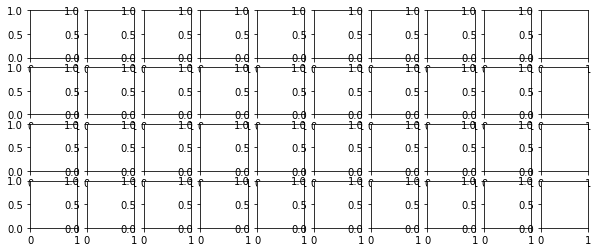

In [7]:
with tf.Session() as sess:
  sess.run(init)

  for i in range(1, num_steps+1):
    batch_x, _ = mnist.train.next_batch(batch_size)
    #generate noise to feed to teh generator
    z = np.random.uniform(-1., 1., size=[batch_size, noise_dim])

    #train
    feed_dict = {disc_input: batch_x, gen_input: z}
    _, _, gl, dl = sess.run([train_gen, train_disc, gen_loss, disc_loss],
                    feed_dict=feed_dict)
    if i%1000==0 or i==1:
      print('Step %i: Generator Loss: %f, Discriminator Loss: %f' % (i, gl, dl))
  
  f, a = plt.subplots(4, 10, figsize=(10, 4))
  for i in range(10):
    #Noise input
    z = np.random.uniform(-1., 1.,size=[4, noise_dim])
    g = sess.run([gen_sample], feed_dict={gen_input: z})
    g = np.reshape(g, newshape=(4, 28, 28, 3))
    a[j][i].imshow(img)
  
  f.show()
  plt.draw()
  plt.waitforbuttonpress()

